In [114]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

LBP: Local Binary Pattern. Descriptor basado en textura -> Invariante a cambios de intensidad, de contraste, invariante a desplazamientos

Dado un pixel se recorre la vecindad y se compara con el pixel central. Se escribe 1 o 0 según sea mayor o menor que el central

Con esto se obtiene un número en base 2 y con este número en base 10 se escribe el pixel central

In [115]:
def get_pixel(img, center, x, y):
    value = 0
    try:
        # Si el vecino es mayor o igual al pixel central, se devuelve 1
        if img[x][y] >= center:
            value = 1
              
    except:
        # Si estamos en un borde omitimos
        pass
      
    return value

8 vecinos

In [116]:
def calculate_pixel(img, x, y):
    center = img[x][y]
   
    val_ar = []
      
    # top_left
    val_ar.append(get_pixel(img, center, x-1, y-1))
    # top
    val_ar.append(get_pixel(img, center, x-1, y))
    # top_right
    val_ar.append(get_pixel(img, center, x-1, y + 1))
    # right
    val_ar.append(get_pixel(img, center, x, y + 1))
    # bottom_right
    val_ar.append(get_pixel(img, center, x + 1, y + 1))
    # bottom
    val_ar.append(get_pixel(img, center, x + 1, y))
    # bottom_left
    val_ar.append(get_pixel(img, center, x + 1, y-1))
    # left
    val_ar.append(get_pixel(img, center, x, y-1))
    # Now, we need to convert binary
    # values to decimal
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
   
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
          
    return val

In [117]:
img_1 = cv.imread('images/Imagen1.png')
img_2 = cv.imread('images/Imagen2.png')
img_3 = cv.imread('images/Imagen3.png')
img_4 = cv.imread('images/Imagen4.png')
img_5 = cv.imread('images/Imagen5.png')

images = [img_1,img_2,img_3,img_4,img_5]

In [126]:
def lbp_image(img):
    height, width, _ = img.shape
    img_lbp = np.zeros((height, width), np.uint8)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = calculate_pixel(img_gray, i, j)

    return img_lbp
    

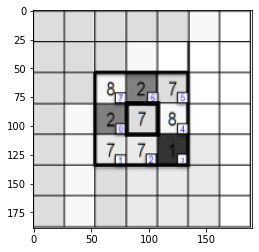

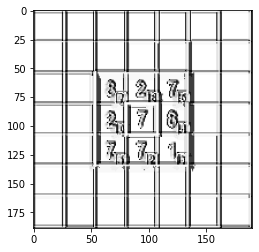

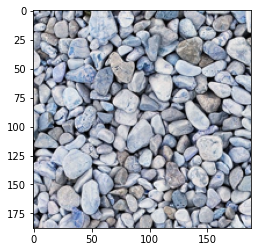

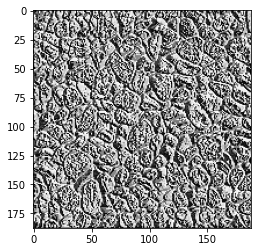

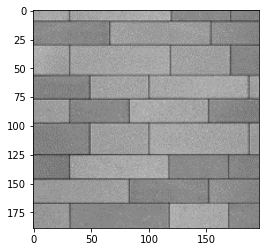

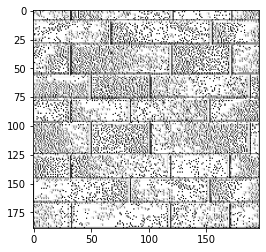

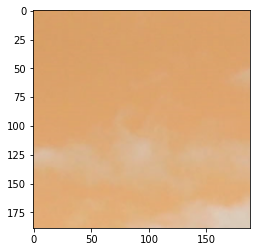

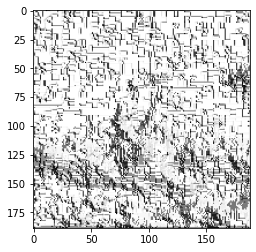

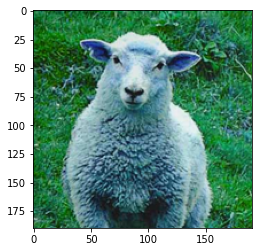

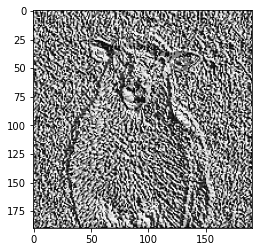

In [127]:
lbp_images = []

for img in images:
    img_lbp = lbp_image(img)
    plt.imshow(img)
    plt.show()
    
    plt.imshow(img_lbp, cmap ="gray")
    plt.show()

    lbp_images.append(img_lbp)

Ejercicio 2 - Histogramas

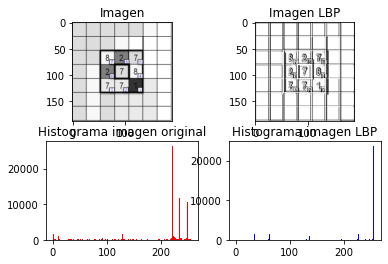

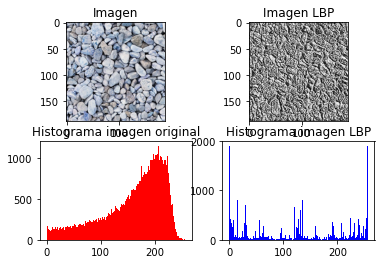

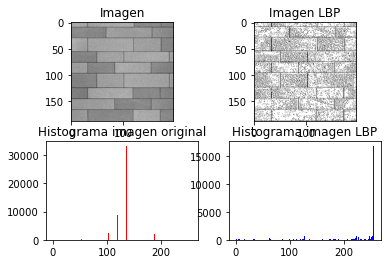

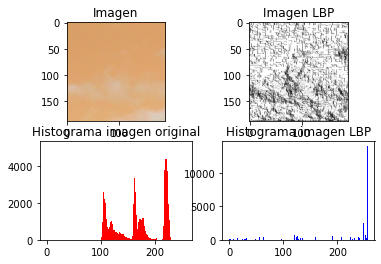

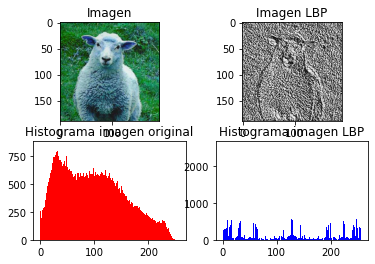

In [119]:
for i in range(len(lbp_images)):
    transformed_img = lbp_images[i]
    img = images[i]

    plt.subplot(2,2,1)
    plt.title("Imagen")
    plt.imshow(img, cmap='gray')
    plt.subplot(2,2,2)
    plt.title("Imagen LBP")
    plt.imshow(transformed_img, cmap='gray')

    hist,bins = np.histogram(img.flatten(),256,[0,256])
    hist_t,bins_t = np.histogram(transformed_img.flatten(),256,[0,256])

    plt.subplot(2,2,3)
    plt.title("Histograma imagen original")
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.subplot(2,2,4)
    plt.title("Histograma imagen LBP")
    plt.hist(transformed_img.flatten(),256,[0,256], color = 'b')
    plt.show()

In [112]:
def show_histograms(image, transformed_img, hist_count):
    HISTOGRAMS = hist_count

    count = 1
    total_images = HISTOGRAMS
    pixels = int(transformed_img.shape[0] / HISTOGRAMS**(1/2))
    for x in range(int(HISTOGRAMS**(1/2))):
        for y in range(int(HISTOGRAMS**(1/2))):
            plt.title("Cuadrante " + str(count - 1))
            plt.subplot(total_images, 1, count)
            img = image.copy()
            cv.rectangle(img,(pixels * x,pixels * y),(pixels * (x + 1),pixels * (y + 1)), (255,0,0), 15)
            plt.imshow(img, cmap='gray')
            plt.show()
            count += 1
            plt.subplot(total_images, 2, count)
            plt.title("Histograma imagen LBP - cuadrante " + str(count - 1))
            plt.hist(transformed_img[pixels * x : pixels * (x + 1), pixels * y : pixels * (y + 1)].flatten(),256,[0,256], color = 'b')
            plt.show()

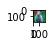

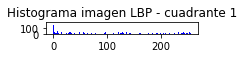

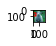

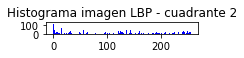

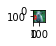

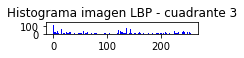

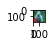

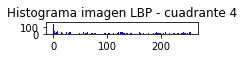

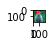

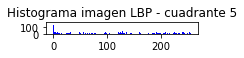

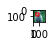

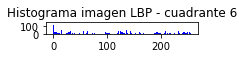

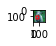

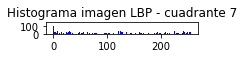

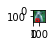

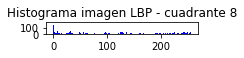

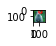

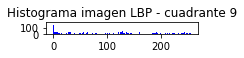

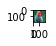

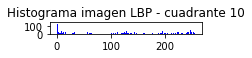

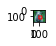

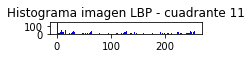

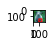

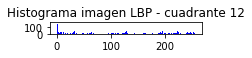

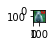

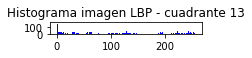

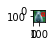

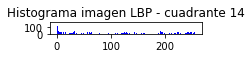

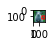

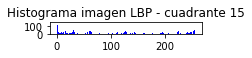

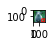

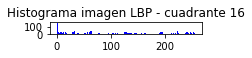

In [113]:
show_histograms(images[4], lbp_images[4], 16)

Comparamos el histograma de la lbp de una oveja de internet con la que calculamos previamente

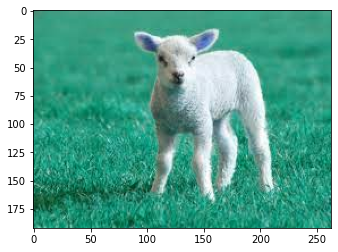

In [134]:
oveja = cv.imread('images/oveja.jpeg')
plt.imshow(oveja)

In [141]:
hist1 = cv.calcHist([lbp_image(oveja)],[0],None,[256],[0,256])
hist2 = cv.calcHist([lbp_images[4]],[0],None,[256],[0,256])

In [142]:
a=cv.compareHist(hist1,hist2,cv.HISTCMP_CORREL)
a

0.9058073666813694

In [143]:
hist1 = cv.calcHist([oveja],[0],None,[256],[0,256])
hist2 = cv.calcHist([images[4]],[0],None,[256],[0,256])

In [144]:
a=cv.compareHist(hist1,hist2,cv.HISTCMP_CORREL)
a

0.7186812597964143